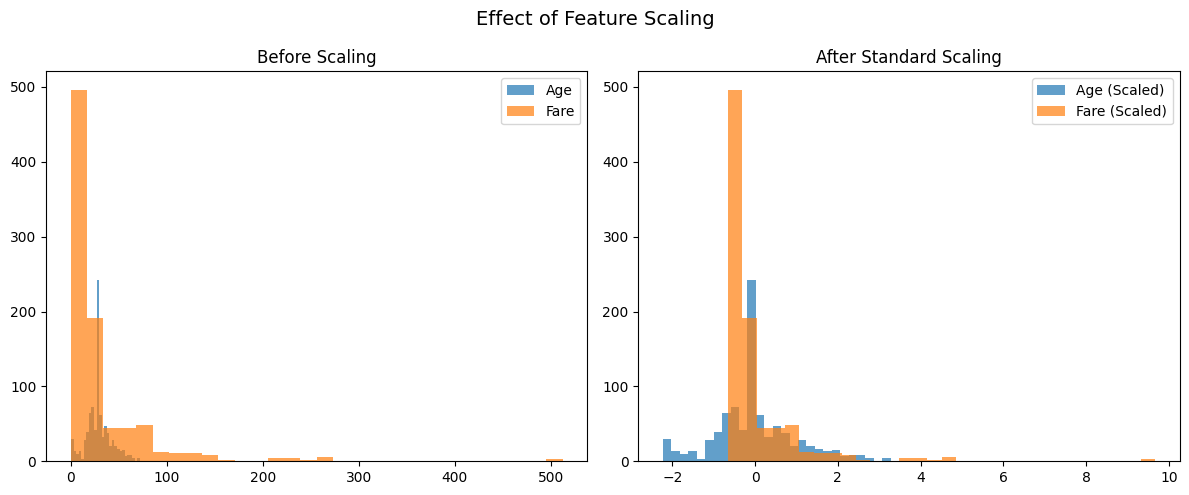

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load your Titanic data
df = pd.read_csv("C:/ML/data/train.csv")

# Handle missing values (as done earlier)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Create a copy for scaling comparison
before_scaling = df[['Age', 'Fare']].copy()

# Apply Standard Scaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

after_scaling = df[['Age', 'Fare']]

# ---- Plot before and after ----
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Before Scaling")
plt.hist(before_scaling['Age'], bins=30, alpha=0.7, label='Age')
plt.hist(before_scaling['Fare'], bins=30, alpha=0.7, label='Fare')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("After Standard Scaling")
plt.hist(after_scaling['Age'], bins=30, alpha=0.7, label='Age (Scaled)')
plt.hist(after_scaling['Fare'], bins=30, alpha=0.7, label='Fare (Scaled)')
plt.legend()

plt.suptitle("Effect of Feature Scaling", fontsize=14)
plt.tight_layout()
plt.show()


In [2]:
# 02 - Data Preprocessing: Encoding & Scaling

# ---------------------------------------------
# 📦 Step 1: Import Libraries
# ---------------------------------------------
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

# ---------------------------------------------
# 🧩 Step 2: Create a Sample Dataset
# ---------------------------------------------
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Large'],
    'Age': [22, 35, 45, 28, 40],
    'Salary': [25000, 50000, 80000, 30000, 65000]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

# ---------------------------------------------
# 🎯 Step 3: Label Encoding (for ordered categories)
# ---------------------------------------------
# Let's assume Size has an order: Small < Medium < Large
size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
df['Size_LabelEncoded'] = df['Size'].map(size_mapping)

print("\nAfter Label Encoding (Size):")
print(df[['Size', 'Size_LabelEncoded']])

# ---------------------------------------------
# 🎯 Step 4: One Hot Encoding (for non-ordered categories)
# ---------------------------------------------
# For Color (no order), we’ll create new columns
df_onehot = pd.get_dummies(df['Color'], prefix='Color')
df = pd.concat([df, df_onehot], axis=1)

print("\nAfter One Hot Encoding (Color):")
print(df[['Color', 'Color_Blue', 'Color_Green', 'Color_Red']])

# ---------------------------------------------
# 📏 Step 5: Feature Scaling (for numerical columns)
# ---------------------------------------------
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Let's apply MinMax scaling on Age and Salary
df[['Age_MinMax', 'Salary_MinMax']] = scaler_minmax.fit_transform(df[['Age', 'Salary']])

# Apply Standard scaling (mean=0, variance=1)
df[['Age_Standard', 'Salary_Standard']] = scaler_standard.fit_transform(df[['Age', 'Salary']])

print("\nAfter Scaling:")
print(df[['Age', 'Salary', 'Age_MinMax', 'Salary_MinMax', 'Age_Standard', 'Salary_Standard']])

# ---------------------------------------------
# ✅ Final Clean Data
# ---------------------------------------------
print("\n✅ Final Preprocessed Data:")
print(df)


Original Dataset:
   Color    Size  Age  Salary
0    Red   Small   22   25000
1   Blue  Medium   35   50000
2  Green   Large   45   80000
3    Red  Medium   28   30000
4   Blue   Large   40   65000

After Label Encoding (Size):
     Size  Size_LabelEncoded
0   Small                  1
1  Medium                  2
2   Large                  3
3  Medium                  2
4   Large                  3

After One Hot Encoding (Color):
   Color  Color_Blue  Color_Green  Color_Red
0    Red       False        False       True
1   Blue        True        False      False
2  Green       False         True      False
3    Red       False        False       True
4   Blue        True        False      False

After Scaling:
   Age  Salary  Age_MinMax  Salary_MinMax  Age_Standard  Salary_Standard
0   22   25000    0.000000       0.000000     -1.459513        -1.205607
1   35   50000    0.565217       0.454545      0.121626         0.000000
2   45   80000    1.000000       1.000000      1.337887     